# Euclidean Rhythms

Euclidean Rhythms were discovered in 2004 and first described in [this paper](http://cgm.cs.mcgill.ca/~godfried/publications/banff.pdf)
First we're going to implement the bjorklund algorithm, during which we'll see how these sequences work and hopefully get some intuition as for why they are attractive musically. 


### Intuition 
Bjorklund sequences are binary sequences characteriezd by spacing that is as even as possible. 

This is a Bjorklund sequence:

0 1 0 1 0 1 1

This is not:

0 0 0 1 1 1 1

Individual Bjorklund sequences can be defined by three parameters:

- the number of "on" elements in the sequence - *pulses*
- the number of total elements in the sequence - *steps*
- an optional third parameter - *rotation*

Rotation is a little difficult to visualize when using linear sequential notation, but imagine a circular sequence like a clock where every third hour was "on". Expressed linearly, it would look like this:

1 0 0 1 0 0 1 0 0 1 0 0

And if you rotated all the "on"s one hour clockwise, it would look like this:

0 1 0 0 1 0 0 1 0 0 1 0

It's an identical sequence with a different rotation. Linearly, this is expressed by severing some of the end and tacking it onto the beginning. 

This is very musically relevant because the "same" sequences will sound very different rotated. In ethnomusicology, rhythms that are rotations of each other are said to be of the same "rhythmic necklace".

The euclid.py module contains a function that generates bjorklund sequences, adapted from the [original paper's](https://ics-web.sns.ornl.gov/timing/Rep-Rate%20Tech%20Note.pdf) C code. If you're interested in how the algorithm works, there's a good intuitive description [here](http://cgm.cs.mcgill.ca/~godfried/publications/banff.pdf) and a full technical description in the paper. 


In [7]:
from euclid import bjorklund

The bjorklund function takes two or three arguments: pulses, steps, and (optional) rotation. Pulses has to be less than steps or an error will be raised.

In [8]:
bjorklund(3, 5)

[1, 0, 1, 0, 1]

In [9]:
bjorklund(3, 5, 1)

[0, 1, 0, 1, 1]

In [10]:
bjorklund(4, 8)

[1, 0, 1, 0, 1, 0, 1, 0]

In [18]:
bjorklund(17, 25, 13)

[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]

One approach to applying these binary sequences to music21 streams is to "slice" the stream at offsets specified by the bjorklund sequence. To show how this can work, we'll start with a simple whole note.

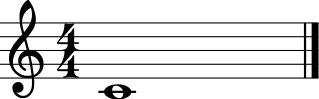

In [31]:
import music21
stream = music21.stream.Stream()
note= music21.note.Note()
note.quarterLength=4
stream.append(note)
stream.show()

The first thing we'll need to do is to produce a binary sequence using our bjorklund function. Then we'll need to convert the binary sequence into a list of durations that specifies the onset of the pulse. The most pervasive unit of time in which music21 deals with duration is the quarterLength, so we're shooting for a list of onets specified in quarterLengths. 

In [55]:
euclidBinary = bjorklund(4, 7, 0)
print(euclidBinary)

[1, 0, 1, 0, 1, 0, 1]


In [56]:
euclidQuarterLengths = []
for i in range(0, len(euclidBinary)):
        if euclidBinary[i] == 1:
            euclidQuarterLengths.append((stream.duration.quarterLength/len(euclidBinary))*i)

print(euclidQuarterLengths)

[0.0, 1.1428571428571428, 2.2857142857142856, 3.4285714285714284]


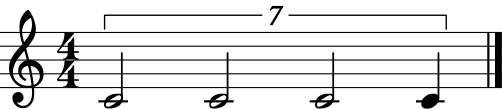

In [57]:
stream.sliceAtOffsets(euclidQuarterLengths, addTies=False).show()

Now, this produced some pretty legible output. Note, however, that there are many situations when using the "slice at offsets" technique can lead to some very illegible notation. This isn't neccisarily a bad thing all of the time... especially if you only care about obtaining midi output for a sequencer, in which case the notational legibility isn't concerning. Let's try for another method that makes something a little nicer. 

In [106]:
stream2 = music21.stream.Stream()

In [107]:
targetLength = 8

In [108]:
euclidBinary = bjorklund(21, 24, 0)
print(euclidBinary)

[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]


In [109]:
step = targetLength/len(euclidBinary)
for i in range(0, len(euclidBinary)):
        if euclidBinary[i] == 1:
            note = music21.note.Note()
            note.duration.quarterLength=step
            stream2.append(note)
        else:
            rest = music21.note.Rest()
            rest.duration.quarterLength=step
            stream2.append(rest)

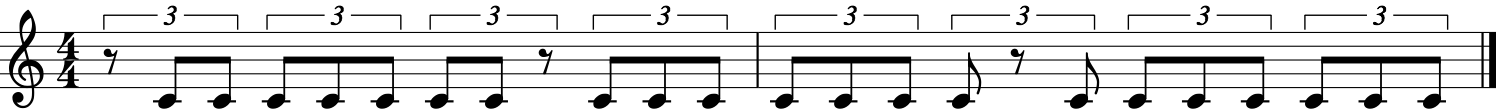

In [110]:
stream2.show()